# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data.shape

(23699, 22)

In [3]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


* приведем в соответствие стилю наименование столбцов:

In [4]:
data = data.rename(
    columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'}
)
#проверим изменения
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]]

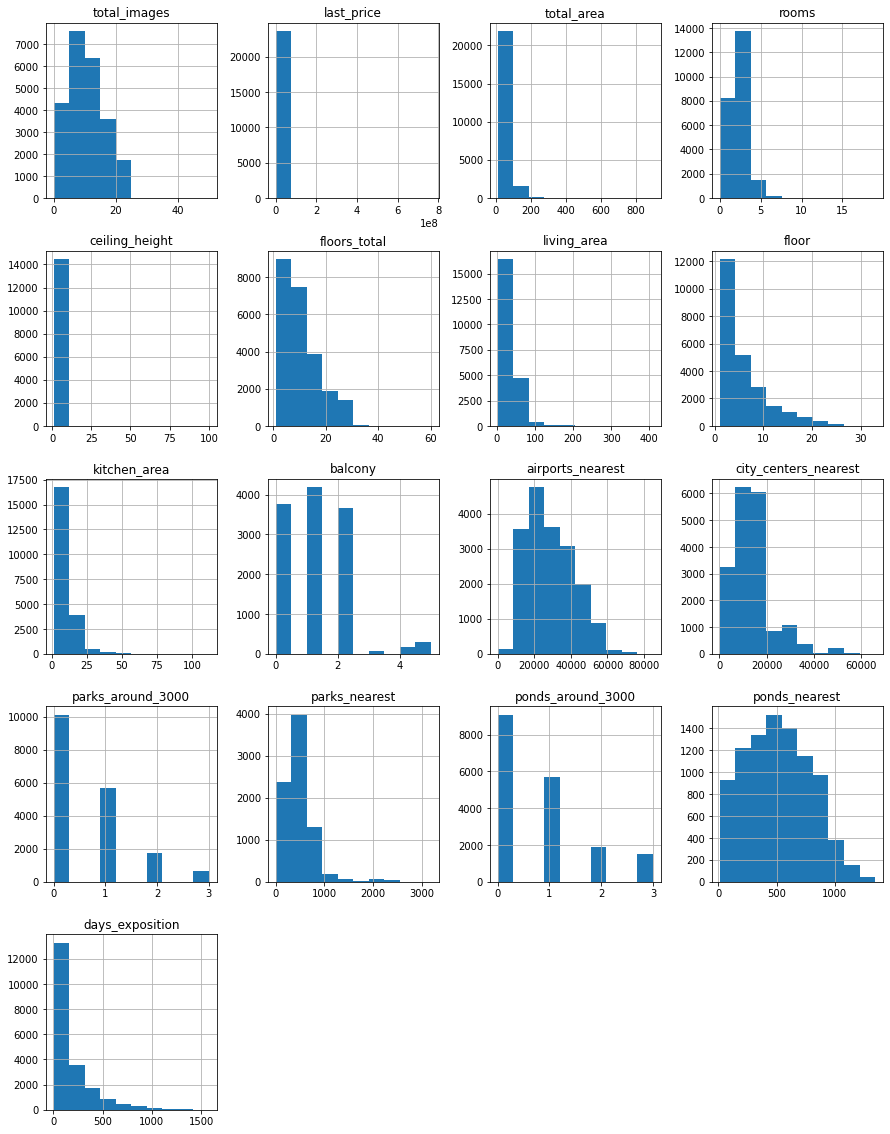

In [5]:
#строим гистограмму для всех числовых столбцов data
data.hist(figsize=(15,20))

Выводы по гистограммам:

        + total_images - есть квартиры, проданные без фотографий.
        + last_price - гистограмма не информативна, нужно детально изучить столбец.
        + total_area - в основном продаются квартиры с общей площадью до 100 кв.м, что похоже на реальность.
        + rooms - в основном продаются квартиры до 5 комнат, что похоже на реальность.
        + ceiling_height - гистограмма не информативна, нужно заполнить пропуски и посмотреть на распределение.
        + floors_total - в большинстве домов до 10-ти этажей, что похоже на реальность. 
        + living_area - в основном продаются квартиры с жилой площадью менее 100 кв.м, что похоже на реальность.
        + floor - пик гистограммы ниже 10, похоже на реальность, прослеживается связь с floors_total.
        + kitchen_area - в основном площадь кухни меньше 25 кв. м, похоже на реальность.
        + balcony - в данных есть пропуски, тк квартиры могут быть и без балконов.
        + airports_nearest, city_centers_nearest,parks_nearest,ponds_nearest -распределение нормальное,похоже на реальность.
        + parks_around_3000,ponds_around_3000 -больше всего значений около 0 и уменьшение значений к 3,похоже на реальность.
        + days_exposition - пик значений меньше 100, похоже на реальность.

### Предобработка данных

#### Посчитаем пропущенные значения в данных.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Тип данных в floors_total заменим на int так как количество этажей это целое число, пропуски заменим на "0". Пропущенных значений в 'locality_name' меньше 1% - заменим пропущенные значения в названии локации на 'unknown'. Это не повлияет на чистоту данных для анализа. 

In [7]:
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].astype('int')

#заменим пропущенные значения в количестве этажей и названии локации на 'unknown'
columns_to_replace = ['locality_name']
for column in columns_to_replace:
    data[column] = data[column].fillna('unknown')
#проверим сколько пропусков осталось
display(data['floors_total'].isna().sum(), data['locality_name'].isna().sum())

0

0

#### Если пользователь не указал число балконов,скорее всего в его квартире их нет, меняем пропуски на 0.

In [8]:
#меняем пропуски на 0.
data['balcony'] = data['balcony'].fillna(value=0)
data['balcony'].isna().sum()

0

In [9]:
data['balcony'] = data['balcony'].astype('int')

#### Проущенные значения в столбцах airports_nearest, cityCenters_nearest, ponds_nearest - это ошибка выгрузки геоданных. В этих столбцах пропуски заполним медианой по сгруппированным значениям.

#### Тип данных в first_day_exposition заменим на datetime для дальнейшего анализа.

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format="%Y-%m-%dT%H:%M")
data['first_day_exposition'].head(5)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

#### В 'is_apartment' должны содержатся булевы значения, пропуски - скорее всего не заполненные пользователем поля, заменим на False. Тип данных заменим на 'bool'.

In [11]:
#в 'is_apartment'пропуски заменим на False.
display(data['is_apartment'].unique())
data['is_apartment'] = data['is_apartment'].fillna(value=False)

data['is_apartment'].astype(bool)
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

array([False,  True])

#### Проверим, есть ли в данных явные дубликаты

In [12]:
data.duplicated().sum()

0

#### Обработаем неявные дубликаты в 'locality_name' методом replace(). Удалим тип городского поселения и оставим только названия.

In [13]:
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [14]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'коттеджный поселок',
              'городской посeлок','поселок','деревня','село',
              'садовое товарищество','станции','садоводческое некоммерческое товарищество','городской' ], '', regex=True)
) 
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

['Санкт-Петербург' ' Шушары' '  Янино-1' ' Парголово' ' Мурино'
 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин' ' Кудрово' 'Коммунар'
 'Колпино' ' Красный Бор' 'Гатчина' ' Федоровское' 'Выборг' 'Кронштадт'
 'Кировск' ' Новое Девяткино' ' Металлострой' ' Лебяжье' ' Сиверский'
 ' Молодцово' ' Кузьмоловский' ' Новая Ропша' 'Павловск' ' Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' ' Куттузи'
 ' Аннино' ' Ефимовский' ' Плодовое' ' Заклинье' ' Торковичи'
 ' Первомайское' 'Красное Село' ' Понтонный' 'Сясьстрой' ' Старая'
 ' Лесколово' ' Новый Свет' 'Сланцы' ' Путилово' 'Ивангород' 'Мурино'
 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор' ' Оржицы'
 ' Кальтино' 'Кудрово' ' Романовка' ' Бугры' ' Рощино' 'Кириши' 'Луга'
 'Волосово' 'Отрадное' ' Павлово' ' Оредеж' ' Копорье' ' Молодежное'
 'Тихвин' ' Победа' ' Нурма' ' Синявино' 'Тосно' ' Стрельна'
 'Бокситогорск' ' Александровская' ' Лопухинка' 'Пикалево' ' Терволово'
 ' Советский' 'Подпорожье' ' Петровское' ' Ток

In [15]:
data['locality_name'].isna().sum()

0

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим столбец с ценой одного квадратного метра и округлим значения до 2-х знаков после запятой.

In [16]:
data['one_m_price'] = data['last_price']/data['total_area']
data['one_m_price'] = round(data['one_m_price'], 2)
data['one_m_price'].head(5)

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: one_m_price, dtype: float64

#### Добавим столбец с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [17]:
data['weekday_publication'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['weekday_publication'].head(5)

0    3
1    1
2    3
3    4
4    1
Name: weekday_publication, dtype: int64

#### Добавим столбец с номером месяца публикации объявления.

In [18]:
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['month_publication'].head(5)

0     3
1    12
2     8
3     7
4     6
Name: month_publication, dtype: int64

#### Добавим столбец с годом публикации объявления.

In [19]:
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['year_publication'].head(5)

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_publication, dtype: int64

#### Добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой»)

In [20]:

def floor_type(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type,axis=1)
data['floor_type'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_type, dtype: int64

#### Добавим столбец с расстоянием до центра города в километрах (переведем из м в км и округлим до ближайших целых значений).

In [21]:
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000
data['city_centers_nearest_km'] = round(data['city_centers_nearest_km'])
data['city_centers_nearest_km'].head(5)

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_centers_nearest_km, dtype: float64

### Проведите исследовательский анализ данных

#### Изучим общую площадь квартир.

* Построим гистограмму по столбцу total_area

<AxesSubplot:>

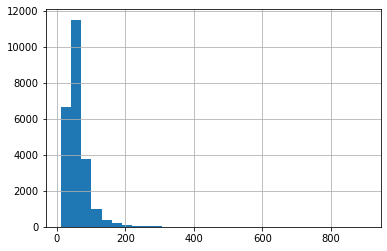

In [22]:
data['total_area'].hist(bins=30)

* Нулевых значений и пропусков нет.

* Посмотрим числовое описание столбца 'total_area':

In [23]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Аномальных значений в столбце 'total_area' не выявлено.

#### Изучим жилую площадь квартир.

<AxesSubplot:>

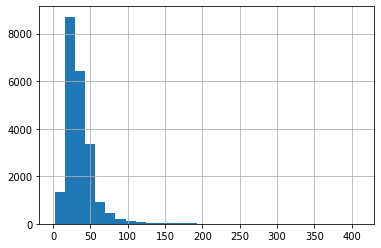

In [24]:
data['living_area'].hist(bins=30)

* Распределение не нормальное, в столбце есть пропуски. Посмотрим числовое описание столбца 'living_area'.

In [25]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

* Максимальное значение в 409,7 кв м и минимальное в 2 кв м. Посмотрим первые 15 значений от 2 кв м и более:

In [26]:
data.loc[data['living_area'] < 18.6].sort_values('living_area').head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_m_price,weekday_publication,month_publication,year_publication,floor_type,city_centers_nearest_km
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,False,False,False,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,122115.38,1,2,2018,другой,7.0
21758,0,2330000.0,23.0,2018-01-01,0,NaN,24,2.0,22,False,True,False,NaN,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0,101304.35,0,1,2018,другой,NaN
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,False,False,False,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,467553.96,1,11,2015,последний,6.0
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17,3.0,17,False,False,False,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,108292.68,6,7,2017,последний,13.0
17582,11,2680000.0,22.0,2018-08-11,0,NaN,25,5.0,8,False,True,False,NaN,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,121818.18,5,8,2018,другой,12.0
21943,15,6100000.0,77.6,2019-02-28,4,2.50,9,5.4,1,False,False,False,9.8,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0,78608.25,3,2,2019,первый,11.0
16431,13,3799000.0,31.0,2018-04-12,1,2.60,5,6.0,1,False,False,False,17.0,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0,122548.39,3,4,2018,первый,5.0
19251,19,4050000.0,33.0,2018-10-15,1,2.50,22,6.5,21,False,False,False,18.0,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0,122727.27,0,10,2018,другой,11.0
23208,12,4800000.0,37.0,2016-02-24,1,NaN,14,8.0,11,False,False,False,22.0,0,Санкт-Петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139.0,129729.73,2,2,2016,другой,12.0
20994,7,8900000.0,50.6,2018-10-22,2,2.50,7,8.0,3,False,False,False,31.0,0,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,NaN,175889.33,0,10,2018,другой,8.0


* Данные квартир с жилой площадью меньше 6 кв м выглядят неправдоподобными, их всего 6 строк - удалим их.

In [27]:
data['living_area'] = data.loc[data['living_area'] > 5.4]
data.loc[data['living_area'] < 18.6].sort_values('living_area').head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_m_price,weekday_publication,month_publication,year_publication,floor_type,city_centers_nearest_km
8601,0,4400000.0,60.2,2018-12-27,4,2.50,5,0.0,4,False,False,False,5.0,1,Ломоносов,47993.0,51418.0,0.0,NaN,0.0,NaN,21.0,73089.70,3,12,2018,другой,51.0
12469,0,7300000.0,72.0,2018-07-24,3,2.95,5,0.0,3,False,False,False,8.7,0,Санкт-Петербург,15972.0,8968.0,0.0,NaN,0.0,NaN,60.0,101388.89,1,7,2018,другой,9.0
20184,0,8600000.0,51.7,2018-09-14,3,2.55,14,0.0,7,False,False,False,6.5,0,Санкт-Петербург,29567.0,13763.0,1.0,765.0,1.0,756.0,11.0,166344.29,4,9,2018,другой,14.0
2030,0,14500000.0,107.0,2018-12-16,3,NaN,16,0.0,8,False,False,False,27.0,0,Санкт-Петербург,39408.0,11111.0,0.0,NaN,0.0,NaN,75.0,135514.02,6,12,2018,другой,11.0
12452,0,4600000.0,35.0,2019-04-05,1,2.50,18,0.0,3,False,False,False,8.0,0,Санкт-Петербург,15791.0,10629.0,0.0,NaN,1.0,1141.0,5.0,131428.57,4,4,2019,другой,11.0
6407,0,2550000.0,58.5,2018-10-23,3,2.60,2,0.0,2,False,False,False,6.5,0,Рахья,NaN,NaN,NaN,NaN,NaN,NaN,104.0,43589.74,1,10,2018,последний,NaN
6408,0,2450000.0,27.0,2017-11-07,0,NaN,23,0.0,22,False,True,False,NaN,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0,90740.74,1,11,2017,другой,NaN
12412,0,3300000.0,27.0,2017-08-15,0,NaN,25,0.0,22,False,False,True,NaN,0,Санкт-Петербург,12199.0,12111.0,0.0,NaN,1.0,337.0,161.0,122222.22,1,8,2017,другой,12.0
2006,0,10140000.0,72.0,2017-06-25,2,NaN,3,0.0,3,False,False,False,10.0,0,Санкт-Петербург,24492.0,3286.0,2.0,155.0,1.0,657.0,71.0,140833.33,6,6,2017,последний,3.0
12484,0,3650000.0,29.0,2017-02-12,1,NaN,9,0.0,9,False,False,False,6.7,0,Санкт-Петербург,17049.0,13072.0,0.0,NaN,0.0,NaN,30.0,125862.07,6,2,2017,последний,13.0


* Посчитаем количество пропусков в столбце.

In [28]:
data['living_area'].isna().sum()

1909

* Заполнить пропуски можно медианным значением жилой площади, исходя из количества комнат. Для этого сначала проведем исследования столбца 'rooms'. Количество комнат изучено и проставлено верно. Заполним пропуски медианным значением жилой площади, исходя из количества комнат:

In [29]:
data.loc[data['living_area'].isna() ,'living_area'] = data.loc[data['rooms'] ,'living_area'].median()
data['living_area'].isna().sum()


0

In [30]:
data['living_area'].astype(float)

0        20.0
1         7.0
2        10.0
3         7.0
4         2.0
         ... 
23694     9.0
23695    14.0
23696    18.0
23697     7.0
23698     4.0
Name: living_area, Length: 23699, dtype: float64

#### Изучим столбец  'rooms'.

<AxesSubplot:>

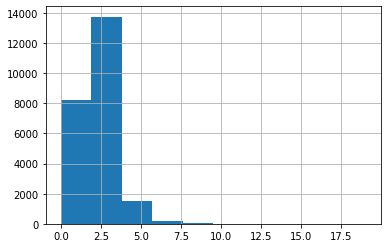

In [31]:
data['rooms'].hist()

Пропусков нет, есть строки с 0. Предположительно это студии или открытые планировки. Проверим гипотезу - сравним количество студий и открытых планировок с количеством нулей в столбце:

In [32]:
print(len(data.query('studio == True or open_plan == True')))
print(len(data.query('rooms == 0')))

216
197


Значения не равны, в целом студия подразумевает объединенное пространство и "0" комнат, посмотрим что входит в studio:

In [33]:
print(data.query('studio == True')['rooms'].value_counts())


0    138
1     11
Name: rooms, dtype: int64


Заменим 11 значений на "0" для однообразия данных:

In [34]:
data.loc[(data['rooms'] == 1) & (data['studio']==True),'rooms'] = 0
print(data.query('studio == True')['rooms'].value_counts())

0    149
Name: rooms, dtype: int64


#### Изучим столбец kitchen_area.

2278


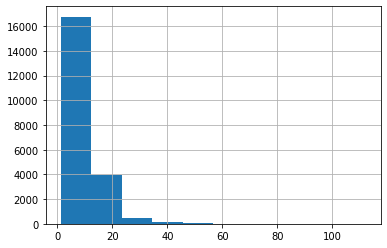

In [35]:
data['kitchen_area'].hist()
print(data['kitchen_area'].isna().sum())

* Есть 2278 пропущенных значений. Поступим как и с living_area - заполним пропуски медианными значениями по количеству комнат.

In [36]:
data.loc[data['kitchen_area'].isna() ,'kitchen_area'] = data.loc[data['rooms'] ,'kitchen_area'].median()
data['kitchen_area'].isna().sum()

0

#### Изучим столбец last_price.

0


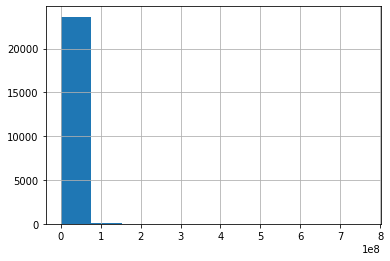

In [37]:
data['last_price'].hist()
print(data['last_price'].isna().sum())

Пропущенных значений нет, гистограмма не информативна, посмотрим числовое описание данных:

In [38]:

data['last_price'].describe().apply("{0:.0f}".format)


count        23699
mean       6541549
std       10887013
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: object

Минимальное значение = 12190, возможно это просто ошибка пользователя, посмотрим 10 минимальных значений 'last_price':

In [39]:
data['last_price'].sort_values().head(10)

8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
17676    450000.0
16219    450000.0
9581     450000.0
5698     450000.0
21912    470000.0
18867    470000.0
Name: last_price, dtype: float64

Аномальное значение одно - 12190, вероятно пользователь не поставил нули. Заменим вручную:

In [40]:
data.loc[8793,'last_price'] = 12190000
data['last_price'].min()

430000.0

#### Изучим столбец ceiling_height.

Построим гистограммы для всех значений потолков, и для часто условно реальных:

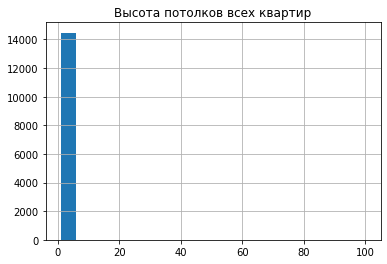

9195

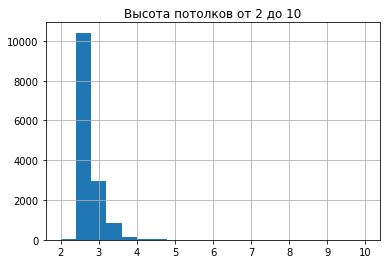

In [41]:

data['ceiling_height'].hist(bins=20).set(title='Высота потолков всех квартир')
plt.show()

data['ceiling_height'].hist(bins=20, range=(2, 10)).set(title='Высота потолков от 2 до 10')
data['ceiling_height'].isna().sum()

In [42]:
display(data['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

 Как видим на второй гистограмме - высота потолков ниже 2.5 м практически не встречается, как и высота выше 4.8 м. Заменим эти значения на медиану столбца. Выроятная причина ошибок в данных - ошибка пользователя при вводе значений, а также могли неверно выгрузится большие значения - например высота 25 м могла быть высотой 2.5 м, ввиду маленького количества таких значений - просто заменим их на медиану.

In [43]:
data.loc[data['ceiling_height'] < 2.5, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] > 4.8, 'ceiling_height'] = data['ceiling_height'].median()

In [44]:
display(data['ceiling_height'].describe())

count    14504.000000
mean         2.726360
std          0.268772
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.800000
Name: ceiling_height, dtype: float64

In [45]:
data['ceiling_height'].isna().sum()

9195

Пропущенные значения заполним медианой.

In [46]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

#### Изучим столбец floor_type.

0

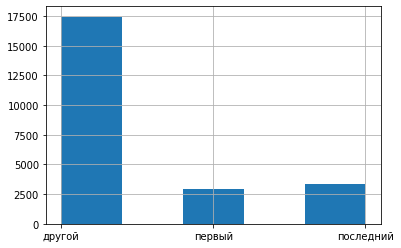

In [47]:
data['floor_type'].hist(bins=5)
data['floor_type'].isna().sum()

Распределение по типам соответствует ожиданиям - больше всего "другой". Пропуски отсутствуют.

#### Изучим столбец floors_total.

0

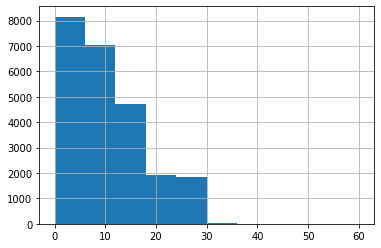

In [48]:
data['floors_total'].hist()
data['floors_total'].isna().sum()

Распределение по этажам без аномалий. Пропуски отсутствуют.

#### Изучим столбец city_centers_nearest.

5519

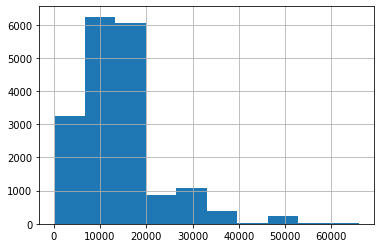

In [49]:
data['city_centers_nearest'].hist()
data['city_centers_nearest'].isna().sum()

In [50]:
print(data['city_centers_nearest'].describe().apply("{0:.2f}".format))
data['city_centers_nearest'].isna().sum()

count    18180.00
mean     14191.28
std       8608.39
min        181.00
25%       9238.00
50%      13098.50
75%      16293.00
max      65968.00
Name: city_centers_nearest, dtype: object


5519

Заполним пропуски медианой по населенным пунктам:

In [51]:
for name in data['locality_name'].unique():
        median_with_name = data.loc[data['locality_name']==name,'city_centers_nearest'].median()
        data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name']==name),'city_centers_nearest'] = median_with_name

data['city_centers_nearest'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

4863

Осталось еще 4863 пропуска, их заполним общей медианой:

In [52]:

data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())

data['city_centers_nearest'].isna().sum()

4863

#### Изучим столбец parks_nearest.

15620

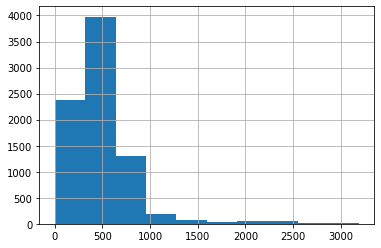

In [53]:
data['parks_nearest'].hist()
data['parks_nearest'].isna().sum()

In [54]:
print(data['parks_nearest'].describe().apply("{0:.2f}".format))
data['parks_nearest'].isna().sum()

count    8079.00
mean      490.80
std       342.32
min         1.00
25%       288.00
50%       455.00
75%       612.00
max      3190.00
Name: parks_nearest, dtype: object


15620

Обнаружили 10757 пропусков. Чтобы понять что нимим делать, проверим столбец parks_around_3000:

In [55]:
print(data['parks_around_3000'].describe().apply("{0:.2f}".format))
data['parks_around_3000'].isna().sum()

count    18181.00
mean         0.61
std          0.80
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around_3000, dtype: object


5518

Обнаружили 655 пропусков. Вероятнее всего пользователи не заполнили эти значения, тк у них не было парков в округе 3000 м. Заполним общей медианой, то есть нулем:

In [56]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['parks_around_3000'].isna().sum()

0

Теперь заполним пропуски в parks_nearest медианными значениями по parks_around_3000:

In [57]:
for value in data['parks_around_3000'].unique():
        median_value = data.loc[data['parks_around_3000']==value,'parks_nearest'].median()
        data.loc[(data['parks_nearest'].isna()) & (data['parks_around_3000']==value),'parks_nearest'] = median_value
data['parks_nearest'].isna().sum()

0

#### Изучим столбец days_exposition и выясним как быстро продаются квартиры.

3181

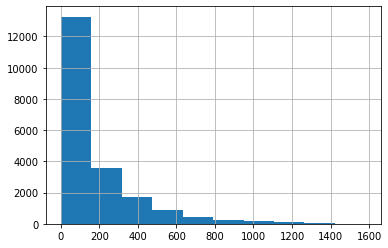

In [58]:
data['days_exposition'].hist()
data['days_exposition'].isna().sum()

Большинство квартир продается за 180 дней, также есть 3181 пропуск, пропуски - вероятно еще не снятые с продажи объявления, посмотрим на числовое описание данных:

In [59]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартиры продаются 180 дней, при этом медиана равна 95. 

Построим еще одну гистограмму, посмотрим на взаимосвязь пропусков и дня опубликования обьявления:

<AxesSubplot:>

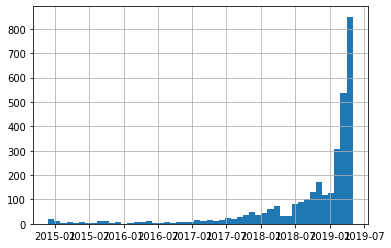

In [60]:
days_nan = data.query('days_exposition.isna()')
days_nan['first_day_exposition'].hist(bins=50)

Количество пропусков возрастает с датой - пропуски это объявления в продаже. Заменим их на медиану столбца, чтобы не искажать исследование.

In [61]:
data['days_exposition'] = data['days_exposition'].fillna(158)
data['days_exposition'].isna().sum()

0

<AxesSubplot:>

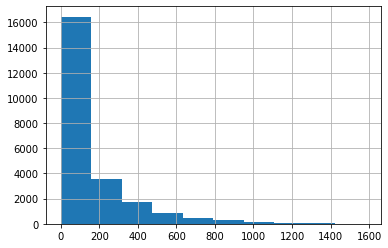

In [62]:
data['days_exposition'].hist(bins=10)

Вывод: большинство квартир продается в первые 300 дней размещения объявления. Также есть необычно долгие продажи свыше 1400 дней.

#### Изучим, какие параметры больше всего влияют на продажу.
Построим матрицу корреляции для наглядного отображения зависимости продажи от разных факторов:

In [63]:
corr_matrix = data.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_m_price,weekday_publication,month_publication,year_publication,city_centers_nearest_km
total_images,1.000000,0.104449,0.115352,0.099539,0.050425,0.014896,0.031340,0.010532,-0.029303,-0.024407,0.097017,0.048903,-0.002298,-0.053288,0.037085,-0.041067,-0.011553,-0.003034,-0.028904,0.132780,-0.010433,0.005043,0.140411,-0.047120
last_price,0.104449,1.000000,0.653741,0.363261,0.277370,-0.006992,0.026760,0.026955,-0.025366,-0.008805,0.441694,0.008530,-0.026205,-0.212229,0.197874,-0.165907,0.159951,-0.084809,0.072793,0.736407,0.001535,0.002733,-0.043015,-0.207030
total_area,0.115352,0.653741,1.000000,0.758267,0.389680,-0.075629,-0.024754,0.029633,-0.072653,-0.034885,0.568073,0.009941,-0.030753,-0.239633,0.200211,-0.170807,0.162346,-0.097969,0.128996,0.301960,-0.004695,0.004920,-0.079912,-0.231255
rooms,0.099539,0.363261,0.758267,1.000000,0.248580,-0.226148,-0.150994,0.000419,-0.152602,-0.087423,0.251079,-0.015815,-0.061304,-0.197521,0.157562,-0.141627,0.092652,-0.057642,0.111473,0.055371,-0.004060,-0.004305,-0.054781,-0.184297
ceiling_height,0.050425,0.277370,0.389680,0.248580,1.000000,-0.084568,-0.047942,0.068149,0.003667,-0.001902,0.319910,-0.042965,-0.082013,-0.298367,0.246898,-0.208373,0.190878,-0.109466,0.097047,0.282665,-0.024850,-0.001333,-0.052138,-0.298235
floors_total,0.014896,-0.006992,-0.075629,-0.226148,-0.084568,1.000000,0.667070,-0.025958,0.066999,0.050863,0.152825,0.175188,0.106608,0.046627,-0.158245,0.130362,-0.122079,0.039854,-0.045957,0.146509,0.011918,0.016538,0.009269,0.017722
floor,0.031340,0.026760,-0.024754,-0.150994,-0.047942,0.667070,1.000000,-0.013294,0.036940,0.035824,0.127991,0.168567,0.071597,0.030864,-0.105212,0.088400,-0.076312,0.024850,-0.035254,0.129068,0.012347,0.019387,0.004915,0.008574
is_apartment,0.010532,0.026955,0.029633,0.000419,0.068149,-0.025958,-0.013294,1.000000,-0.003657,-0.002448,0.041742,0.033022,0.016470,0.004758,0.021559,-0.006997,0.023989,0.003357,0.012753,0.044725,-0.009492,0.002369,0.009413,0.003555
studio,-0.029303,-0.025366,-0.072653,-0.152602,0.003667,0.066999,0.036940,-0.003657,1.000000,-0.004235,0.005508,0.028899,-0.021876,0.005170,-0.032014,0.033676,0.000939,0.002606,-0.021017,0.015636,-0.000843,0.000976,0.011961,-0.007468
open_plan,-0.024407,-0.008805,-0.034885,-0.087423,-0.001902,0.050863,0.035824,-0.002448,-0.004235,1.000000,0.003687,0.032639,-0.013583,0.001684,-0.016378,0.020282,0.008455,-0.003328,-0.023289,0.008266,0.011042,0.025765,-0.021095,-0.003802


На матрице корреляции мы видим, что общая стоимость квартиры зависит от:
* общая площадь - корреляция 0,65;

При это общая стоимость квартиры имеет слабую зависимость от:
* площади кухни - корреляция 0,44;
* количества комнат - корреляция 0,36;

Общая стоимость квартиры абсолютно не зависит от даты размещения (день недели, месяц, год).

Также проверим зависит ли цена продажи от жилой площади^

In [64]:
print(data['last_price'].corr(data['living_area'].astype(float)))

0.09855341465516723


Вывод общая стоимость квартиры абсолютно не зависит от жилой площади с корреляцией 0,09.

Также проверим зависит ли цена продажи от этажа, на котором расположена квартира (первый, последний, другой). Для этого создадим категории этжей и сводную таблицу.

In [65]:

floor_type_last = data.pivot_table(index='floor_type',values='last_price',aggfunc='median')

floor_type_last

,last_price
floor_type,
другой,4850000.0
первый,3900000.0
последний,4300000.0


 Вывод: квартиры на первом этаже значительно дешевле чем на других.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
Построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [66]:
last_price_top = data['locality_name'].value_counts().head(10)
last_price_top = last_price_top.reset_index().rename(columns = {'locality_name':'mean','index':'locality_name'})
last_price_top_mean = []
for name in last_price_top['locality_name']:
    last_price_top_mean.append(data.query('locality_name == @name')['one_m_price'].mean())
last_price_top['mean'] = last_price_top_mean
print(last_price_top)
print('Вывод:')
print('Наибольшая стоимость кв. м в г.',last_price_top.loc[0,'locality_name'],':', last_price_top.loc[0,'mean'])
print('Наименьшая стоимость кв. м в г.',last_price_top.loc[9,'locality_name'],':', last_price_top.loc[9,'mean'])


     locality_name           mean
0  Санкт-Петербург  114849.008793
1           Мурино   85681.762572
2           Шушары   78677.364318
3       Всеволожск   68654.473970
4           Пушкин  103125.819377
5          Колпино   75424.579112
6        Парголово   90175.913089
7          Гатчина   68746.146515
8          Кудрово   92473.547559
9           Выборг   58141.909325
Вывод:
Наибольшая стоимость кв. м в г. Санкт-Петербург : 114849.00879333376
Наименьшая стоимость кв. м в г. Выборг : 58141.909324894514


#### Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. 
Изучим, как стоимость объектов зависит от расстояния до центра города. Построим сводную таблицу по средней стоимости 1 кв. м в зависимости от расстояния от центра:

In [67]:
spb_apartment = data.query('locality_name == "Санкт-Петербург"')
spb_apartment_pivot = spb_apartment.pivot_table(index='city_centers_nearest_km', 
                                              values='one_m_price', aggfunc='mean').reset_index()
spb_apartment_pivot

,city_centers_nearest_km,one_m_price
0,0.0,245833.530370
1,1.0,177005.407604
2,2.0,157849.007290
3,3.0,121387.453743
4,4.0,133282.874738
5,5.0,140509.789022
6,6.0,151012.193673
7,7.0,156176.879524
8,8.0,125671.442864
9,9.0,113131.041939


Построим график зависимости стоимости жилья от расстояния до центра города:

<AxesSubplot:title={'center':'Зависимость стоимости жилья от расстояния до центра города'}, xlabel='city_centers_nearest_km'>

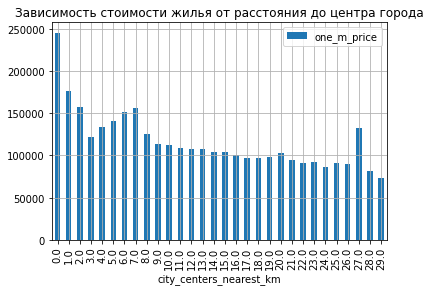

In [68]:
spb_apartment_pivot.plot(x='city_centers_nearest_km', y='one_m_price', kind= 'bar', 
                        grid=True,
                      title='Зависимость стоимости жилья от расстояния до центра города')

Вывод:

Средняя цена за 1 кв.м падает при удалении от центра. В центре стоимость жилья составляет почти 250 000 руб. за 1 кв.м, а на расстоянии 29 км - падает до 75 000 руб. за 1 кв.м.

### Общий вывод

Для анализа нам были предоставлены данные по продажам квартир. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя. 

На этапе предобработки данных было выявлено:
* несоответствие стилю наименование столбцов - привели наименования к snake_style;
* пропуски в ceiling_height - заменили медианным значением;
* пропуски в floors_total и balcony - заменили на 0;
* пропуски в living_area и kitchen_area - заменили медианой по сгрупированным значениям площади;
* пропуски в is_apartment заменили на False, и изменили тип данных на bool;

Вероятная причина пропусков значений в столбцах - ошибки при выгрузке и из-за некорректного заполнения данных пользователем. 

Заменили тип данных в first_day_exposition на datetime.

Обработали неявные дубликаты в столбце locality_name - удалили типы населенных пунктов из названий. Дубликаты появились из-за некорректного заполнения данных пользователем.

В таблицу были добавлены новые столбцы со следующими параметрами:
* цена одного квадратного метра;
* ень недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах.

Исследование показало, что большинство квартир продается в первые 300 дней размещения объявления. Также есть необычно долгие продажи свыше 1400 дней, но их количество очень мало. Также мы выяснили, что общая стоимость квартиры выше в зависимости от общей площади и этажа - на этаже кроме первого - квартиры дороже.При этом общая стоимость квартиры имеет слабую зависимость от площади кухни и количества комнат и абсолютно не зависит от жилой площади и даты размещения (день недели, месяц, год).

Также стоимость квартир зависит от местонахождения квартиры:
Наибольшая стоимость кв. м в г. Санкт-Петербург : 114 849 руб.
Наименьшая стоимость кв. м в г. Выборг : 58 141 руб.

Исследование объявлений в Санкт-Петербурге показало - средняя цена за 1 кв.м падает при удалении от центра. В центре стоимость жилья составляет почти 250 000 руб. за 1 кв.м, а на расстоянии 29 км - падает до 75 000 руб. за 1 кв.м.